Using:
    https://gist.github.com/EdwardJRoss/86b31848a7951411de56f10f55e9de4e
    https://forums.fast.ai/t/character-level-language-model/31379
    
Lesson 4 RNN


In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.text import *
import string
from unidecode import unidecode


In [3]:
torch.cuda.get_device_name(0)

'Tesla P100-PCIE-16GB'

In [3]:
df = pd.read_csv('/home/trpb2/data/takeaway/raw_just_eat_multi.csv')

In [4]:
df['text'] = df.text.str.lower()

In [5]:
#chains to drop and replace

to_drop = df[df.text.str.contains('asda kitchen', regex= True, na=False)].text.tolist()
df = df[~df.text.isin(to_drop)]
df = df.append({'label1' : 'Pizza' , 'text' : "asda kitchen"} , ignore_index=True)

to_drop = df[df.text.str.contains('basilico', regex= True, na=False)].text.tolist()
df = df[~df.text.isin(to_drop)]
df = df.append({'label1' : 'Pizza' , 'text' : "basilico"} , ignore_index=True)

to_drop = df[df.text.str.contains('bella italia', regex= True, na=False)].text.tolist()
df = df[~df.text.isin(to_drop)]
df = df.append({'label1' : 'Pizza' , 'text' : "bella italia"} , ignore_index=True)

to_drop = df[df.text.str.contains('birdbox', regex= True, na=False)].text.tolist()
df = df[~df.text.isin(to_drop)]
df = df.append({'label1' : 'Chicken' , 'text' : "birdbox"} , ignore_index=True)

to_drop = df[df.text.str.contains('blazing bird', regex= True, na=False)].text.tolist()
df = df[~df.text.isin(to_drop)]
df = df.append({'label1' : 'Chicken' , 'text' : "blazing bird"} , ignore_index=True)

to_drop = df[df.text.str.contains('burger king', regex= True, na=False)].text.tolist()
df = df[~df.text.isin(to_drop)]
df = df.append({'label1' : 'Burgers' , 'text' : "burger king"} , ignore_index=True)

to_drop = df[df.text.str.contains('caspian pizza', regex= True, na=False)].text.tolist()
df = df[~df.text.isin(to_drop)]
df = df.append({'label1' : 'Pizza' , 'text' : "caspian pizza"} , ignore_index=True)

to_drop = df[df.text.str.contains('chicken cottage', regex= True, na=False)].text.tolist()
df = df[~df.text.isin(to_drop)]
df = df.append({'label1' : 'Chicken' , 'text' : "chicken cottage"} , ignore_index=True)

to_drop = df[df.text.str.contains('chiquito', regex= True, na=False)].text.tolist()
df = df[~df.text.isin(to_drop)]
df = df.append({'text' : "chiquito"} , ignore_index=True)

to_drop = df[df.text.str.contains('firezza', regex= True, na=False)].text.tolist()
df = df[~df.text.isin(to_drop)]
df = df.append({'label1' : 'Pizza' , 'text' : "firezza"} , ignore_index=True)

to_drop = df[df.text.str.contains("frankie & benny's", regex= True, na=False)].text.tolist()
df = df[~df.text.isin(to_drop)]
df = df.append({'label1' : 'American' , 'text' : "frankie & benny's"} , ignore_index=True)

to_drop = df[df.text.str.contains('gbk', regex= True, na=False)].text.tolist()
df = df[~df.text.isin(to_drop)]
df = df.append({'label1' : 'Burgers' , 'text' : "gourmet burger kitchen (gbk)"} , ignore_index=True)

to_drop = df[df.text.str.contains('greggs', regex= True, na=False)].text.tolist()
df = df[~df.text.isin(to_drop)]
df = df.append({'label1' : 'Sandwiches' , 'text' : "greggs"} , ignore_index=True)

to_drop = df[df.text.str.contains('harvester', regex= True, na=False)].text.tolist()
df = df[~df.text.isin(to_drop)]
df = df.append({'label1' : 'American' , 'text' : "harvester"} , ignore_index=True)

to_drop = df[df.text.str.contains('itsu', regex= True, na=False)].text.tolist()
df = df[~df.text.isin(to_drop)]
df = df.append({'label1' : 'Japanese' , 'text' : "itsu"} , ignore_index=True)

to_drop = df[df.text.str.contains('kfc', regex= True, na=False)].text.tolist()
df = df[~df.text.isin(to_drop)]
df = df.append({'label1' : 'Chicken' , 'text' : "kfc"} , ignore_index=True)

to_drop = df[df.text.str.contains('kick ass', regex= True, na=False)].text.tolist()
df = df[~df.text.isin(to_drop)]
df = df.append({'text' : "kick ass burrito"} , ignore_index=True)

to_drop = df[df.text.str.contains('las iguanas', regex= True, na=False)].text.tolist()
df = df[~df.text.isin(to_drop)]
df = df.append({'text' : "las iguanas"} , ignore_index=True)

to_drop = df[df.text.str.contains('papa john', regex= True, na=False)].text.tolist()
df = df[~df.text.isin(to_drop)]
df = df.append({'label1' : 'Pizza' , 'text' : "papa john's"} , ignore_index=True)

to_drop = df[df.text.str.contains('pizza hut', regex= True, na=False)].text.tolist()
df = df[~df.text.isin(to_drop)]
df = df.append({'label1' : 'Pizza' , 'text' : "pizza hut"} , ignore_index=True)

to_drop = df[df.text.str.contains('stack & grill', regex= True, na=False)].text.tolist()
df = df[~df.text.isin(to_drop)]
df = df.append({'label1' : 'American' , 'text' : "stack & grill by cafe rouge"} , ignore_index=True)

to_drop = df[df.text.str.contains('stacks', regex= True, na=False)].text.tolist()
df = df[~df.text.isin(to_drop)]
df = df.append({'label1' : 'Burgers' , 'text' : "stacks"} , ignore_index=True)

to_drop = df[df.text.str.contains('subway', regex= True, na=False)].text.tolist()
df = df[~df.text.isin(to_drop)]
df = df.append({'label1' : 'Sandwiches' , 'text' : "subway"} , ignore_index=True)

to_drop = df[df.text.str.contains('tim horton', regex= True, na=False)].text.tolist()
df = df[~df.text.isin(to_drop)]
df = df.append({'label1' : 'Sandwiches' , 'text' : "tim horton"} , ignore_index=True)

to_drop = df[df.text.str.contains('toby carvery', regex= True, na=False)].text.tolist()
df = df[~df.text.isin(to_drop)]
df = df.append({'label1' : 'British' , 'text' : "toby carvery"} , ignore_index=True)

to_drop = df[df.text.str.contains('tortilla -', regex= True, na=False)].text.tolist()
df = df[~df.text.isin(to_drop)]
df = df.append({'text' : "tortilla"} , ignore_index=True)

to_drop = df[df.text.str.contains('turtle bay', regex= True, na=False)].text.tolist()
df = df[~df.text.isin(to_drop)]
df = df.append({'label1' : 'Caribbean' , 'text' : "turtle bay"} , ignore_index=True)

to_drop = df[df.text.str.contains('wimpy', regex= True, na=False)].text.tolist()
df = df[~df.text.isin(to_drop)]
df = df.append({'label1' : 'Burgers' , 'text' : "wimpy"} , ignore_index=True)

to_drop = df[df.text.str.contains('yo!', regex= True, na=False)].text.tolist()
df = df[~df.text.isin(to_drop)]
df = df.append({'label1' : 'Japanese' , 'text' : "yo! sushi"} , ignore_index=True)


## Character Set

What letters outside of ASCII are in the names?


In [86]:
foreign_chars = Counter(_ for _ in ''.join(str(list(df.text))) if _ not in string.ascii_letters)
foreign_chars.most_common()


[(' ', 78961),
 ("'", 57420),
 (',', 30075),
 ('"', 5668),
 ('&', 2781),
 ('-', 1306),
 ('(', 305),
 (')', 305),
 ('’', 270),
 ('2', 240),
 ('1', 222),
 ('.', 220),
 ('@', 204),
 ('4', 122),
 ('0', 114),
 ('3', 83),
 ('8', 74),
 ('9', 61),
 ('7', 55),
 ('6', 52),
 ('5', 52),
 ('é', 31),
 ('`', 26),
 ('!', 24),
 ('´', 19),
 ('/', 14),
 ('+', 7),
 ('‘', 7),
 ('#', 7),
 ('?', 4),
 ('ê', 4),
 ('–', 4),
 (':', 4),
 ('°', 3),
 ('*', 3),
 ('ó', 2),
 ('è', 2),
 ('ö', 2),
 ('%', 2),
 ('[', 1),
 ('á', 1),
 ('ü', 1),
 ('®', 1),
 ('\\', 1),
 ('~', 1),
 ('ä', 1),
 (']', 1)]

In [87]:
df['ascii_name'] = df.text.apply(lambda x: unidecode(str(x)))
df[df.text != df.ascii_name]

,label1,label2,label3,text,ascii_name,ascii_name_fix
57,Caribbean,NaN,NaN,izatu’s kitchen,izatu's kitchen,izatu's kitchen
108,Caribbean,Caribbean,NaN,ruby’s bar and cuisine,ruby's bar and cuisine,ruby's bar and cuisine
146,Caribbean,Caribbean,NaN,afromumii @ lovelygloworm café,afromumii @ lovelygloworm cafe,afromumii @ lovelygloworm cafe
179,American,Burgers,NaN,friendly phil’s chatham,friendly phil's chatham,friendly phil's chatham
189,American,Chicken,NaN,lesley’s hot wings,lesley's hot wings,lesley's hot wings
308,American,Italian,NaN,hot ´n´ tender l1,hot 'n' tender l1,hot 'n' tender l1
323,American,Desserts,NaN,auntie anne’s,auntie anne's,auntie anne's
366,American,Burgers,NaN,harlie’s,harlie's,harlie's
397,American,NaN,NaN,roxy’s bistro bar,roxy's bistro bar,roxy's bistro bar
426,American,Burgers,NaN,raindell’s,raindell's,raindell's


In [88]:
foreign_chars = Counter(_ for _ in ''.join(str(list(df.ascii_name))) if _ not in string.ascii_letters)
foreign_chars.most_common()

[(' ', 78961),
 ("'", 57150),
 (',', 30075),
 ('"', 6234),
 ('&', 2781),
 ('-', 1310),
 ('(', 306),
 (')', 306),
 ('2', 240),
 ('1', 222),
 ('.', 220),
 ('@', 204),
 ('4', 122),
 ('0', 114),
 ('3', 83),
 ('8', 74),
 ('9', 61),
 ('7', 55),
 ('6', 52),
 ('5', 52),
 ('`', 26),
 ('!', 24),
 ('/', 14),
 ('+', 7),
 ('#', 7),
 ('?', 4),
 (':', 4),
 ('*', 3),
 ('%', 2),
 ('[', 1),
 ('\\', 1),
 ('~', 1),
 (']', 1)]

In [89]:
df['ascii_name_fix'] = df.ascii_name.str.replace('`',"'")
df['ascii_name_fix'] = df.ascii_name_fix.str.replace('~'," ")
df['ascii_name_fix'] = df.ascii_name_fix.str.replace(']'," ")
df['ascii_name_fix'] = df.ascii_name_fix.str.replace('['," ")
df['ascii_name_fix'] = df.ascii_name_fix.str.replace('\\'," ")
df['ascii_name_fix'] = df.ascii_name_fix.str.replace('%'," ")
df['ascii_name_fix'] = df.ascii_name_fix.str.replace('*'," ")
df['ascii_name_fix'] = df.ascii_name_fix.str.replace(':'," ")
df['ascii_name_fix'] = df.ascii_name_fix.str.replace('+'," and ")
df['ascii_name_fix'] = df.ascii_name_fix.str.replace('/'," ")
suss_chars = ['`',']','%']
df[df.ascii_name_fix.str.contains('|'.join(suss_chars))]

,label1,label2,label3,text,ascii_name,ascii_name_fix


## Check for duplicates


convert long to wide

In [90]:
label1 = df.label1.unique()
label2 = df.label2.unique()
#label3 = df.label3.unique()
#labels = list(set().union(label1, label2, label3))
labels = list(set().union(label1, label2))

In [91]:
miss_1 = list(set(labels) - set(label1))
miss_2 = list(set(labels) - set(label2))
#miss_3 = list(set(labels) - set(label3))

In [92]:
#df.pivot(index='ascii_name_fix', columns='label1', values='label1')
dummies1 = pd.get_dummies(data = df['label1'])
dummies2 = pd.get_dummies(data = df['label2'])
#dummies3 = pd.get_dummies(data = df['label3'])

In [93]:
#pd.concat([dummies1,pd.DataFrame(columns=miss_1)])
dummies1.reindex(columns=labels, fill_value=0)
dummies2.reindex(columns=labels, fill_value=0)
#dummies3.reindex(columns=labels, fill_value=0)
#dummy_all = (dummies1|dummies2|dummies3).astype(int)
dummy_all = (dummies1|dummies2).astype(int)

In [94]:
df2=pd.concat([df['ascii_name_fix'],dummy_all], axis=1)
len(df2)

30076

Check the one hot encoding

In [95]:
df2[df2['ascii_name_fix']=='africfood']

,ascii_name_fix,American,Asian,Breakfast,British,Burgers,Caribbean,Chicken,Chinese,Curry,...,Kebab,Mediterranean,Mexican,Middle Eastern,Noodles,Peri Peri,Pizza,Sandwiches,Thai,Turkish
52,africfood,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [96]:
name_classes = df2.groupby(df2.columns.tolist()).size().reset_index(name='count')

In [97]:
name_classes.loc[name_classes['count']> 10,['ascii_name_fix', 'count']]

,ascii_name_fix,count
2102,bengal spice,18
3896,charcoal grill,13
4522,china chef,11
4552,china express,11
4559,china garden,25
6011,delightful desserts,11
6358,dixy chicken,15
6362,dixy chicken,15
7279,farmhouse pizza,15
8565,golden dragon,17


In [98]:
df2[df2['ascii_name_fix']=='dixy chicken']

,ascii_name_fix,American,Asian,Breakfast,British,Burgers,Caribbean,Chicken,Chinese,Curry,...,Kebab,Mediterranean,Mexican,Middle Eastern,Noodles,Peri Peri,Pizza,Sandwiches,Thai,Turkish
161,dixy chicken,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
260,dixy chicken,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
281,dixy chicken,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
293,dixy chicken,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
329,dixy chicken,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
343,dixy chicken,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
531,dixy chicken,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
578,dixy chicken,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3228,dixy chicken,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3314,dixy chicken,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [99]:
df3=pd.concat([df2['ascii_name_fix'],df2.groupby('ascii_name_fix').transform('any').astype(int)], axis=1)
len(df3)

30076

In [100]:
df4 = df3.drop_duplicates()
len(df4)

23998

In [101]:
df4[df4['ascii_name_fix']=='dixy chicken']

,ascii_name_fix,American,Asian,Breakfast,British,Burgers,Caribbean,Chicken,Chinese,Curry,...,Kebab,Mediterranean,Mexican,Middle Eastern,Noodles,Peri Peri,Pizza,Sandwiches,Thai,Turkish
161,dixy chicken,1,0,0,0,1,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0



### Distribution by Language

The dataset is very unbalanced.


In [102]:
df4.sum(axis=0)[1:].sort_values(ascending =True)

Mexican            306
Middle Eastern     334
Noodles            339
Japanese           387
Asian              461
English            520
Sandwiches         542
British            547
Turkish            612
Caribbean          621
Peri Peri          680
Mediterranean      706
Thai               771
American           932
Breakfast          936
Grill              946
Desserts          1361
Chicken           1947
Fish & Chips      2046
Italian           2313
Burgers           2404
Chinese           2940
Curry             3547
Kebab             4223
Indian            5762
Pizza             6747
dtype: object


## Create Validation and Training Sets

We want our final model to work well on any language.

But if we pick our validation set uniformly at random from the data we're likely to get many Indian and not many African, which isn't a good test of this.

So instead we'll take our validation set from an equal number from each subclass.


In [103]:
df4 = df4.reset_index().drop('index', 1)

In [104]:
counts = df4.sum(axis=0)[1:].sort_values(ascending =True)
counts.keys()

Index(['Mexican', 'Middle Eastern', 'Noodles', 'Japanese', 'Asian', 'English',
       'Sandwiches', 'British', 'Turkish', 'Caribbean', 'Peri Peri',
       'Mediterranean', 'Thai', 'American', 'Breakfast', 'Grill', 'Desserts',
       'Chicken', 'Fish & Chips', 'Italian', 'Burgers', 'Chinese', 'Curry',
       'Kebab', 'Indian', 'Pizza'],
      dtype='object')

In [105]:
valid_size = 150 # We'll pick 30 at random from each subclass
train_size = 6000 # For a balanced training set we'll pick 500 at random with replacement

In [106]:
np.random.seed(6011)
df4['valid'] = False
valid_idx = []
for label in counts.keys():
    # Random sample of size "valid_size" for each class
    #valid_idx += list(df4[(df4[label] == 1) & ~df4.valid].sample(valid_size).index)
    valid_idx += list(df4[(df4[label] == 1)].sample(valid_size).index)
    #df4.loc[valid_idx, 'valid'] = True
df4.loc[valid_idx, 'valid'] = True

In [107]:
len(df4[df4['valid']==True])

3719

In [108]:
len(df4.columns.tolist())

28

In [109]:
np.random.seed(7012)
balanced_idx = []
for label in counts.keys():
    # Random sample of size "train_size" for each class from the data outside of the validation set
    balanced_idx += list(df4[(df4[label] == 1) & ~df4.valid].sample(train_size, replace=True).index)

Let's record our balanced set in the dataframe: this will make it easy to reload at a later point.

In [110]:
df4['bal'] = 0
for k, v in Counter(balanced_idx).items():
    df4.loc[k, 'bal'] += v

In [111]:
df4.to_csv('names_clean_multi.csv', index=False)

In [112]:
df4.head()

,ascii_name_fix,American,Asian,Breakfast,British,Burgers,Caribbean,Chicken,Chinese,Curry,...,Mexican,Middle Eastern,Noodles,Peri Peri,Pizza,Sandwiches,Thai,Turkish,valid,bal
0,taste of afghanistan,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,False,39
1,masa restaurant harrow,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,True,0
2,kobeda king,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,True,0
3,taste of afghan,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,False,34
4,ariana restaurant,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,True,0


## Build a Fastai Data Loader

Load in the dataframe and extract indexes for training, validation and balanced trainings.

In [113]:
df4 = pd.read_csv('names_clean_multi.csv')

valid_idx = df4[df4.valid].index
train_idx = df4[~df4.valid].index

bal_idx = []
for k, v in zip(df4.index, df4.bal):
    bal_idx += [k]*v



In [114]:
class LetterTokenizer(BaseTokenizer):
    "Character level tokenizer function."
    def __init__(self, lang): pass
    def tokenizer(self, t:str) -> List[str]:
        out = []
        i = 0
        while i < len(t):
            if t[i:].startswith(BOS):
                out.append(BOS)
                i += len(BOS)
            else:
                out.append(t[i])
                i += 1
        return out
            
    def add_special_cases(self, toks:Collection[str]): pass

In [115]:
itos = [UNK, BOS] + list(string.ascii_lowercase + " -'@&)(." +"0123456789")

In [116]:
vocab=Vocab(itos)
tokenizer=Tokenizer(LetterTokenizer, pre_rules=[], post_rules=[])

In [121]:
train_df = df4.iloc[train_idx, 0:27]
bal_df = df4.iloc[bal_idx, 0:27]
valid_df = df4.iloc[valid_idx, 0:27]

In [122]:
train_df

,ascii_name_fix,American,Asian,Breakfast,British,Burgers,Caribbean,Chicken,Chinese,Curry,...,Kebab,Mediterranean,Mexican,Middle Eastern,Noodles,Peri Peri,Pizza,Sandwiches,Thai,Turkish
0,taste of afghanistan,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,taste of afghan,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5,kabul city restaurant,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6,zeenat,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7,ariana flame grill,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
8,zaytoon restaurant,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
9,al taiba bukhari,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
11,afghan spice takeaway,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
13,kabul palace,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
16,bismillah restaurant,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


## Language model

Language model with Just Eat data only

In [8]:
data = TextLMDataBunch.from_df(path='.', train_df=train_df, valid_df=valid_df,
                         tokenizer=tokenizer, vocab=vocab, text_cols=0, mark_fields=False, bs=512)

In [12]:
learn = language_model_learner(data, AWD_LSTM, drop_mult=0.5)

In [13]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


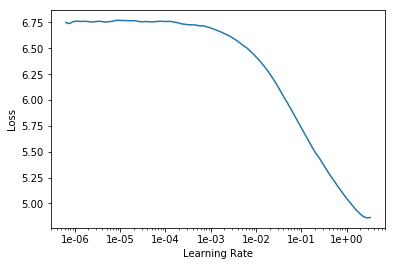

In [14]:
learn.recorder.plot()

In [15]:
learn.fit_one_cycle(10, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,6.485972,5.916473,0.045480,00:05
1,5.853712,4.462358,0.096484,00:05
2,5.038223,3.166984,0.144322,00:05
3,4.423561,2.761329,0.211649,00:05
4,3.982985,2.578562,0.255999,00:05
5,3.656172,2.492234,0.280441,00:05
6,3.411972,2.456651,0.282868,00:05
7,3.227278,2.431865,0.289579,00:05
8,3.093958,2.425161,0.287988,00:05
9,2.988554,2.423029,0.289062,00:05


In [16]:
learn.unfreeze()

In [17]:
learn.fit_one_cycle(10, 1e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,2.604180,2.364469,0.304074,00:07
1,2.512649,2.230950,0.352720,00:07
2,2.378639,2.114728,0.389886,00:07
3,2.262332,1.950011,0.424023,00:07
4,2.144041,1.862915,0.451521,00:07
5,2.052262,1.809955,0.463449,00:07
6,1.974553,1.770566,0.481975,00:07
7,1.913326,1.749688,0.487863,00:07
8,1.872672,1.737815,0.489076,00:07
9,1.837855,1.738389,0.489732,00:07


In [18]:
learn.fit_one_cycle(10, 1e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,1.745569,1.735588,0.489886,00:07
1,1.714540,1.706368,0.496331,00:07
2,1.709823,1.684006,0.504157,00:07
3,1.703901,1.787087,0.487430,00:07
4,1.680631,1.620577,0.521359,00:07
5,1.646245,1.591193,0.530064,00:07
6,1.627885,1.572742,0.534375,00:07
7,1.601289,1.565842,0.535561,00:07
8,1.578724,1.560962,0.537193,00:07
9,1.563173,1.561628,0.537095,00:07


In [19]:
learn.fit_one_cycle(10, 1e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,1.542375,1.559327,0.535547,00:07
1,1.530416,1.545105,0.543150,00:07
2,1.509477,1.528399,0.546791,00:07
3,1.496619,1.598190,0.525112,00:07
4,1.512994,1.528596,0.550600,00:07
5,1.488790,1.486422,0.559528,00:07
6,1.479360,1.482232,0.562054,00:07
7,1.461005,1.471041,0.563979,00:07
8,1.454008,1.473299,0.563602,00:07
9,1.438516,1.471511,0.563993,00:07


In [20]:
TEXT = "bob"
N_WORDS = 100
N_SENTENCES = 50

In [21]:
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

bob b o l d   k e b a b   h o u s e xxbos   s u p e r xxbos   b a l t i   p i z z a xxbos   t h e   d e l i g h t   c h i c k e n xxbos   r o o s t e r s   c h o i c e xxbos   p i z z a   g o g o   f i r e d s n e r xxbos   n e
bob a n   r e s t a u r a n t xxbos   b i t e   c r o m y xxbos   b e s t   b o x xxbos   h a r r y ' s   g r i l l   &   f r i e d   c h i c k e n   &   p i z z a xxbos   t h e   f u s i o n   g r i l l xxbos   s a n d o o
bob a n a   r e s t a u r a n t xxbos   s t t a t i o n xxbos   m o n g h a m xxbos   m a g i n o ' s   b a l t i xxbos   g a r d e n   f a s t   f o o d xxbos   t a s t y   f i s h   &   c h i p s xxbos   l e b a n e s e s e  
bob b e r n   t r a d i t o p a l e xxbos   d e s s e r t   b a l t i xxbos   s h i g h t ' s   f i s h   b a r xxbos   g r e e n   k i t c h e n xxbos   m e a s   p i z z a xxbos   t h e   p i z z a   k y   c h i c k e n xxbos
bob e l l   f r i e d   c h i c k e n xxbos   k i n g s   c h e f xxbos   m e l a k e y   m 

In [22]:
learn.save_encoder('just_eat_enc')

In [ ]:
learn.recorder.plot_losses()

## Classifier with Just Eat data

In [123]:
label_cols = df4.columns.tolist()[1:27]

In [124]:
label_cols

['American',
 'Asian',
 'Breakfast',
 'British',
 'Burgers',
 'Caribbean',
 'Chicken',
 'Chinese',
 'Curry',
 'Desserts',
 'English',
 'Fish & Chips',
 'Grill',
 'Indian',
 'Italian',
 'Japanese',
 'Kebab',
 'Mediterranean',
 'Mexican',
 'Middle Eastern',
 'Noodles',
 'Peri Peri',
 'Pizza',
 'Sandwiches',
 'Thai',
 'Turkish']

In [125]:
data = TextClasDataBunch.from_df(path='.', train_df=bal_df, valid_df=valid_df,
                         tokenizer=tokenizer, vocab=vocab, text_cols = 0, label_cols = label_cols,
                         mark_fields=False, bs=512)

In [126]:
data.show_batch()

text,target
c h a r c o a l g r i l l t u r k i s h r e s t a u r a n t - s o u t h b u r y r o a d,Kebab;Turkish
d i a g o ' s d e l i h o t s a n d w i c h ' s a n d g o u r m e t b u r g e r s n w,Breakfast;Burgers
j a n c h i k o r e a n k i t c h e n @ b a n g b a n g o r i e n t a l f o o d h a l l,Asian
a p h r o d i t e ' s g r e e k m e d i t e r r a n e a n c u i s i n e & p i z z e r i a,Mediterranean;Pizza
c h a r c o a l g r i l l t u r k i s h r e s t a u r a n t - s o u t h b u r y r o a d,Kebab;Turkish


In [127]:
learn = text_classifier_learner(data, AWD_LSTM, drop_mult=0.6, bptt=70, metrics=[fbeta])


In [128]:
learn.load_encoder('just_eat_enc')

In [129]:
learn.freeze()

In [130]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


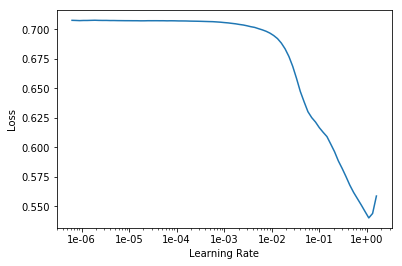

In [131]:
learn.recorder.plot()

In [132]:
learn.fit_one_cycle(3, 5e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,fbeta,time
0,0.221903,0.214575,0.421271,00:38
1,0.208571,0.199921,0.443179,00:36
2,0.201706,0.198340,0.462371,00:35


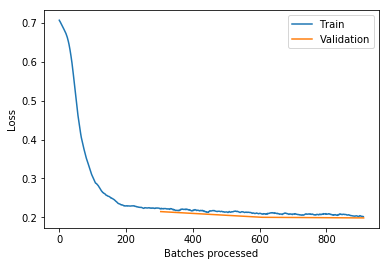

In [133]:
learn.recorder.plot_losses()

In [26]:
learn.freeze_to(-2)

In [134]:
learn.fit_one_cycle(3, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,fbeta,time
0,0.202168,0.197298,0.468437,00:36
1,0.203184,0.195617,0.465564,00:35
2,0.201500,0.196900,0.469572,00:35


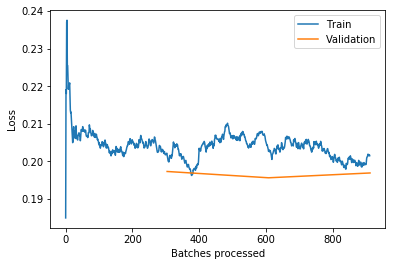

In [135]:
learn.recorder.plot_losses()

In [136]:
learn.freeze_to(-3)
learn.fit_one_cycle(3, slice(5e-3 / (2.6 ** 4), 5e-3), moms=(0.8, 0.7))

epoch,train_loss,valid_loss,fbeta,time
0,0.185131,0.191743,0.509655,00:57
1,0.162799,0.182497,0.543215,01:01
2,0.163790,0.183155,0.549226,01:00


In [137]:
learn.unfreeze()
learn.fit_one_cycle(3, slice(1e-4 / (2.6 ** 4), 1e-4), moms=(0.8, 0.7))

epoch,train_loss,valid_loss,fbeta,time
0,0.161303,0.183489,0.547798,01:12
1,0.161750,0.181986,0.549252,01:11
2,0.162658,0.181967,0.546211,01:12


In [35]:
    def confusion_matrix(self):
        "Confusion matrix as an `np.ndarray`"
        x=torch.arange(0,data.c)
        cm = ((self.pred_class==x[:,None]) & (self.y_true==x[:,None,None])).sum(2)
        return cm.cpu().numpy()

    def plot_confusion_matrix(self, normalize:bool=False, title:str='Confusion matrix', cmap:Any="Blues", figsize:tuple=None):
        "Plot the confusion matrix"
        # This function is copied from the scikit docs
        cm = self.confusion_matrix()
        plt.figure(figsize=figsize)
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, self.data.classes, rotation=45)
        plt.yticks(tick_marks, self.data.classes)

        if normalize: cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')

In [68]:
preds,y,losses = learn.get_preds(with_loss=True)
interp = ClassificationInterpretation(learn, preds, y, losses)

In [37]:
interp.plot_confusion_matrix(figsize=(10,10))

RuntimeError: Expected object of scalar type Float but got scalar type Long for argument #2 'other'

In [38]:
interp.most_confused()

RuntimeError: Expected object of scalar type Float but got scalar type Long for argument #2 'other'

In [72]:
interp.top_losses()

(tensor([15.9808, 14.7814, 12.9131,  ...,  0.0000,  0.0000,  0.0000]),
 tensor([72729, 29448, 45944,  ..., 57872, 52794, 58225]))

In [76]:
interp.data.valid_ds


IndexError: index 72729 is out of bounds for axis 0 with size 2467

In [165]:
learn.predict("tikka masla")

(MultiCategory Indian,
 tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0.]),
 tensor([0.0063, 0.0370, 0.0018, 0.0032, 0.0137, 0.0233, 0.0199, 0.0326, 0.4152,
         0.0026, 0.0080, 0.0072, 0.0880, 0.6984, 0.0338, 0.0676, 0.2287, 0.0258,
         0.0049, 0.0141, 0.0046, 0.0115, 0.0933, 0.0019, 0.0272, 0.1497]))

In [139]:
learn.predict("il pecorino")

(MultiCategory Italian;Pizza,
 tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0., 1., 0., 0., 0.]),
 tensor([5.8999e-02, 1.3309e-03, 2.1839e-02, 9.1041e-03, 9.3423e-02, 4.5669e-03,
         4.8325e-02, 1.3328e-03, 6.2275e-03, 7.8300e-02, 2.0225e-02, 1.7203e-02,
         1.7628e-02, 1.1359e-02, 7.2152e-01, 9.7004e-04, 6.9791e-02, 1.2870e-02,
         1.2012e-01, 5.1732e-03, 2.1305e-04, 4.5331e-02, 5.1176e-01, 5.0827e-02,
         1.1263e-03, 5.8732e-03]))

In [140]:
learn.predict("ying palace")

(MultiCategory Chinese,
 tensor([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0.]),
 tensor([5.4275e-03, 1.3413e-01, 2.6913e-03, 1.7056e-02, 4.6907e-03, 1.7013e-03,
         5.8465e-03, 9.6151e-01, 1.7186e-02, 3.3278e-03, 1.5052e-01, 1.3553e-01,
         1.2281e-03, 1.6836e-02, 2.2711e-03, 9.0785e-03, 3.8639e-03, 1.5377e-03,
         1.9191e-04, 3.2483e-03, 3.3346e-01, 1.1687e-03, 1.1678e-02, 2.0094e-03,
         3.8091e-01, 2.0004e-04]))

In [162]:
learn.predict("jamaica jerkin")

(MultiCategory Caribbean,
 tensor([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0.]),
 tensor([1.4143e-03, 2.8319e-02, 1.3148e-04, 2.2170e-04, 6.9066e-04, 9.8768e-01,
         1.6583e-02, 9.4760e-04, 1.7779e-02, 5.3878e-04, 8.0912e-04, 4.6457e-04,
         3.4405e-02, 5.6235e-02, 2.3505e-03, 3.1816e-02, 4.0034e-02, 3.0203e-02,
         2.1868e-04, 1.3640e-01, 8.8224e-06, 1.9552e-04, 9.4405e-03, 1.6674e-04,
         7.2553e-04, 1.5918e-01]))

In [142]:
learn.predict("abra kebabra")

(MultiCategory Kebab;Turkish,
 tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
         0., 0., 0., 0., 0., 0., 0., 1.]),
 tensor([1.1646e-02, 1.8391e-03, 1.2129e-05, 7.9501e-06, 5.7741e-02, 2.2453e-05,
         1.3607e-02, 4.6609e-05, 3.0891e-02, 1.1202e-04, 9.5323e-04, 2.0943e-03,
         7.9384e-02, 7.8761e-02, 9.1010e-03, 1.1117e-05, 9.9536e-01, 6.0705e-03,
         3.3202e-04, 8.3410e-03, 5.3493e-06, 2.8271e-03, 3.6288e-01, 9.9812e-05,
         1.0931e-04, 7.8201e-01]))

In [143]:
learn.predict("Piccolo's Coffee & Sandwich Bar")

(MultiCategory Breakfast;Sandwiches,
 tensor([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 1., 0., 0.]),
 tensor([3.2879e-03, 4.5197e-04, 9.4352e-01, 2.4149e-02, 1.4831e-02, 1.1613e-02,
         1.5470e-03, 2.4009e-04, 4.0364e-04, 2.0920e-02, 1.5707e-02, 3.7886e-04,
         5.3390e-04, 1.4322e-03, 2.7339e-03, 6.7344e-06, 1.2393e-03, 7.2452e-05,
         6.7689e-04, 1.7283e-05, 2.9743e-05, 2.9530e-04, 3.5402e-03, 8.9925e-01,
         2.9801e-05, 2.3381e-04]))

In [144]:
learn.predict("southern fried rooster")

(MultiCategory Chicken,
 tensor([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0.]),
 tensor([3.2526e-01, 1.9558e-04, 5.4645e-03, 2.2427e-02, 2.7038e-01, 4.8157e-03,
         9.5879e-01, 3.2159e-03, 8.2518e-04, 1.3346e-02, 1.0616e-02, 3.8064e-02,
         2.2873e-02, 1.2690e-03, 3.2586e-03, 2.9166e-05, 3.4655e-02, 5.0200e-04,
         3.5189e-04, 1.9252e-05, 1.5121e-03, 2.9172e-01, 1.5389e-01, 1.3218e-02,
         1.4594e-03, 6.4727e-04]))

In [145]:
learn.predict("luigis")

(MultiCategory ,
 tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.]),
 tensor([0.0923, 0.0115, 0.0671, 0.0806, 0.1134, 0.0502, 0.1174, 0.2418, 0.0423,
         0.0432, 0.0909, 0.1104, 0.1082, 0.0495, 0.1264, 0.0017, 0.1306, 0.1905,
         0.0569, 0.0384, 0.0590, 0.0510, 0.1898, 0.0523, 0.0722, 0.0893]))

In [146]:
learn.predict("mrs boggin's sandwich shop")

(MultiCategory Breakfast;Sandwiches,
 tensor([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 1., 0., 0.]),
 tensor([9.9476e-04, 1.7517e-04, 9.9725e-01, 4.0109e-02, 1.6616e-02, 2.2596e-04,
         1.2460e-04, 3.3435e-05, 7.5527e-06, 3.9544e-03, 1.2917e-02, 3.8031e-05,
         1.1841e-04, 3.9856e-05, 1.4618e-04, 3.4655e-06, 1.2925e-04, 5.6439e-06,
         5.2367e-05, 9.4864e-07, 7.9082e-06, 2.5957e-05, 3.3977e-04, 9.9145e-01,
         1.6442e-06, 5.4335e-05]))

In [147]:
learn.predict("codfather")

(MultiCategory Fish & Chips,
 tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0.]),
 tensor([7.6098e-02, 8.6635e-04, 1.7574e-01, 2.4071e-01, 2.8358e-01, 3.3905e-03,
         6.5782e-02, 5.2693e-03, 1.3664e-02, 5.2783e-02, 2.0883e-01, 8.3399e-01,
         4.0810e-02, 2.0748e-02, 6.3545e-02, 6.2273e-05, 4.2971e-01, 1.8536e-02,
         9.0227e-04, 6.1630e-03, 2.0470e-03, 4.9742e-02, 3.8198e-01, 9.4758e-02,
         2.1574e-03, 4.4887e-02]))

In [148]:
learn.predict("munch box")

(MultiCategory Breakfast;Sandwiches,
 tensor([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 1., 0., 0.]),
 tensor([0.0773, 0.0036, 0.6657, 0.0282, 0.1642, 0.0160, 0.0382, 0.0132, 0.0176,
         0.0365, 0.0492, 0.0053, 0.0269, 0.0471, 0.0167, 0.0015, 0.0401, 0.0019,
         0.0719, 0.0008, 0.0045, 0.0194, 0.0556, 0.5314, 0.0029, 0.0086]))

In [149]:
learn.predict("ming fai")

(MultiCategory Chinese,
 tensor([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0.]),
 tensor([1.3146e-02, 2.3289e-01, 9.5009e-03, 9.0897e-03, 1.7025e-02, 5.3861e-03,
         2.2944e-02, 8.1425e-01, 8.1125e-03, 8.3611e-03, 4.5204e-02, 2.5785e-02,
         4.6621e-03, 9.2096e-03, 5.8792e-03, 5.5117e-02, 1.1162e-02, 2.3304e-03,
         4.9587e-04, 2.6215e-03, 2.9706e-01, 4.2895e-03, 2.7152e-02, 8.5749e-03,
         1.6033e-01, 3.0302e-03]))

In [150]:
learn.predict("fish'n'chick'n")

(MultiCategory Fish & Chips,
 tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0.]),
 tensor([9.7304e-03, 6.0228e-04, 2.3822e-03, 3.3948e-02, 1.8552e-01, 9.0693e-05,
         4.1122e-01, 4.4536e-03, 5.9682e-04, 1.2741e-03, 2.5140e-02, 8.4755e-01,
         6.9587e-03, 4.4515e-04, 4.6585e-03, 7.9491e-05, 1.7953e-01, 1.4564e-03,
         3.1684e-05, 4.6658e-05, 7.9854e-04, 4.4882e-02, 2.0952e-01, 1.7348e-04,
         5.7813e-04, 3.3174e-03]))

In [151]:
learn.predict("yoshida sushi")

(MultiCategory Japanese,
 tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0.]),
 tensor([1.5659e-10, 6.3206e-03, 1.4871e-09, 8.9947e-07, 1.3034e-06, 2.4391e-12,
         3.0564e-07, 4.2846e-04, 2.4454e-07, 3.3679e-08, 2.8897e-07, 6.0590e-08,
         3.6312e-07, 5.0245e-07, 9.5383e-11, 1.0000e+00, 7.4994e-08, 1.9637e-09,
         1.8967e-15, 5.1134e-11, 9.3619e-04, 3.4360e-09, 1.3063e-07, 4.2876e-10,
         1.2697e-05, 2.2460e-09]))

In [152]:
learn.predict("curry extravaganza")

(MultiCategory Curry;Indian,
 tensor([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0.]),
 tensor([8.9097e-04, 7.5121e-03, 9.8520e-06, 2.1724e-04, 4.3327e-04, 1.3994e-04,
         2.1506e-03, 8.2621e-04, 9.8508e-01, 1.1217e-04, 3.9917e-02, 5.4995e-04,
         6.4864e-03, 9.9968e-01, 5.1629e-03, 1.4247e-04, 5.5284e-02, 3.9374e-04,
         8.0273e-04, 2.4795e-04, 4.5711e-05, 3.3129e-03, 6.3747e-02, 1.9087e-05,
         8.1735e-04, 2.2760e-04]))